<a href="https://colab.research.google.com/github/JuanCruzArese/TP-Final-ICD/blob/laburen-aca/TP_Final_ICD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/JuanCruzArese/TP-Final-ICD
%cd BC-ML-Project

Cloning into 'TP-Final-ICD'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (12/12), 1.04 MiB | 2.44 MiB/s, done.
Resolving deltas: 100% (2/2), done.
[Errno 2] No such file or directory: 'BC-ML-Project'
/content


In [ ]:
import pandas as pd # Para manejo de DataFrames
import numpy as np
import matplotlib.pyplot as plt # Para control de figuras
import seaborn as sns # Para visualizaciones (boxplot, heatmap)
from sklearn.model_selection import train_test_split, GridSearchCV # Para dividir datos en train/test y busqueda de grilla.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler # Para escalado robusto
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression # Modelo Regresión Logística
from sklearn.ensemble import RandomForestClassifier # Modelo Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (                          # Métricas de evaluación
    accuracy_score, precision_score, recall_score,
    roc_auc_score, confusion_matrix, f1_score, classification_report, ConfusionMatrixDisplay,
                                                       roc_curve, auc
)
from sklearn.feature_selection import SelectKBest, f_classif # Selector y criterio ANOVA F, respectivamente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         29100 non-null  float64
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

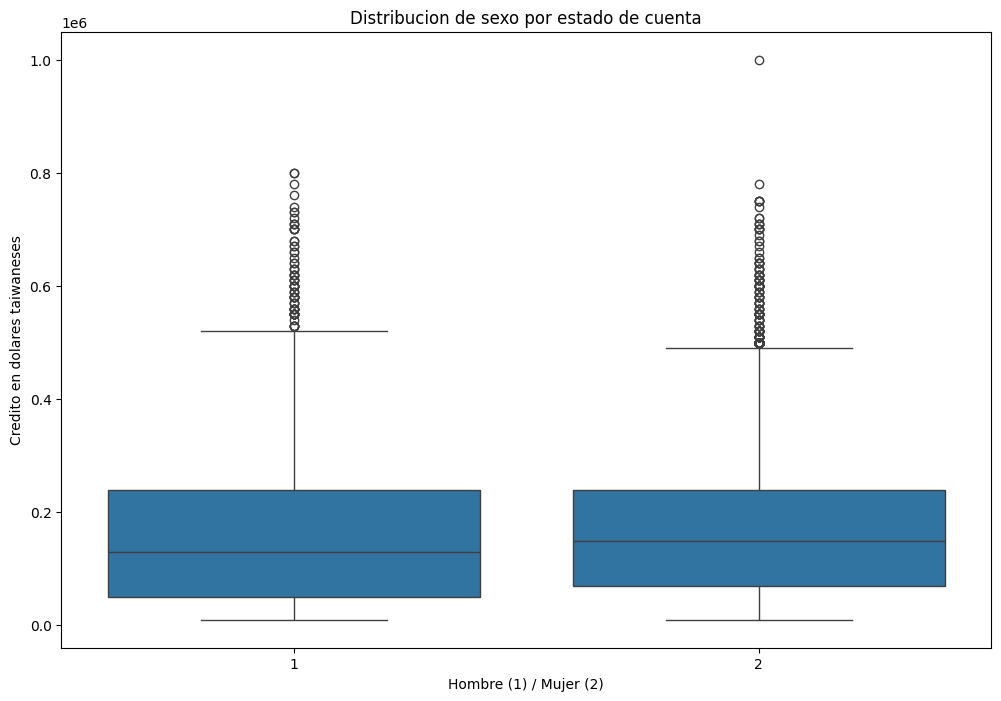

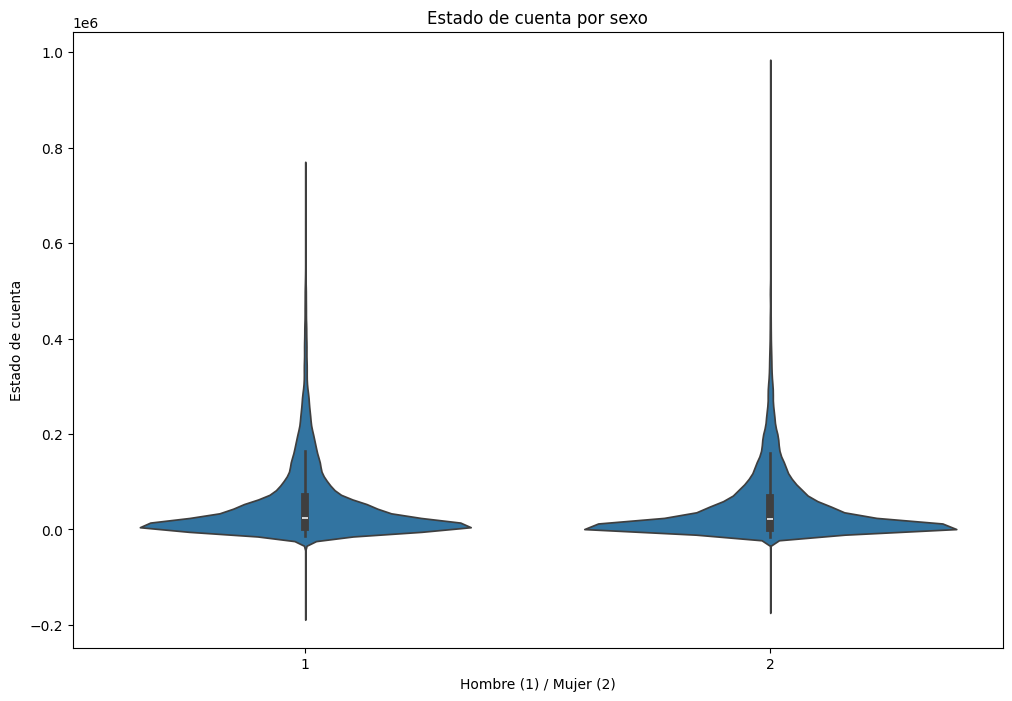

In [21]:
cards_data = pd.read_csv('/content/TP-Final-ICD/UCI_Credit_Card_TF.csv')
cards_data.head(10)

cards_data.info()

cards_data.describe()







plt.figure(figsize=(12, 8))
sns.boxplot(x='SEX', y='LIMIT_BAL', data=cards_data)
plt.title('Distribucion de sexo por estado de cuenta')
plt.xlabel('Hombre (1) / Mujer (2)')
plt.ylabel('Credito en dolares taiwaneses')
plt.show()



plt.figure(figsize=(12, 8))
sns.violinplot(x="SEX", y="BILL_AMT1", data=cards_data)

plt.title("Estado de cuenta por sexo")
plt.xlabel("Hombre (1) / Mujer (2)")
plt.ylabel("Estado de cuenta")
plt.show()